In [13]:
from statsbombpy import sb
%matplotlib inline
import json
from pandas.io.json import json_normalize
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage
from functools import reduce

In [14]:
def draw_pitch(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = Rectangle([0,0], width = 120, height = 80, fill = False)
    #Left, Right Penalty Area and midline
    LeftPenalty = Rectangle([0,22.3], width = 14.6, height = 35.3, fill = False)
    RightPenalty = Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False)
    midline = ConnectionPatch([60,0], [60,80], "data", "data")

    #Left, Right 6-yard Box
    LeftSixYard = Rectangle([0,32], width = 4.9, height = 16, fill = False)
    RightSixYard = Rectangle([115.1,32], width = 4.9, height = 16, fill = False)


    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black", fill = False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    #Penalty spots and Arcs around penalty boxes
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")
    leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")
    
    element = [Pitch, LeftPenalty, RightPenalty, midline, LeftSixYard, RightSixYard, centreCircle, 
               centreSpot, rightPenSpot, leftPenSpot, leftArc, rightArc]
    for i in element:
        ax.add_patch(i)

In [33]:
def pass_map(events_df):

    fig, ax = plt.subplots()
    fig.set_size_inches(7, 5)
    plt.ylim(-2, 82)
    plt.xlim(-2, 122)
    draw_pitch(ax)
    plt.axis('off')
    
    for i in range(len(events_df)):
        color = "red" if events_df.iloc[i]["possession_team"] == "Liverpool" else "black"

        
        ax.annotate("", xy = (events_df.iloc[i]['pass_end_location'][0], events_df.iloc[i]['pass_end_location'][1]), xycoords = 'data',
                xytext = (events_df.iloc[i]['location'][0], events_df.iloc[i]['location'][1]), textcoords = 'data', 
                arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color = color),)
    plt.show()

credentials were not supplied. open data access only


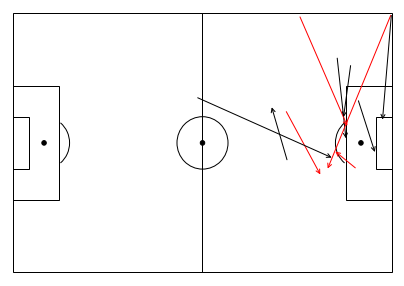

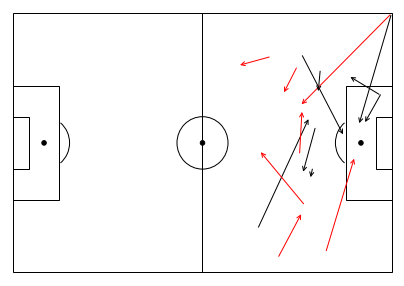

In [43]:
#miracle_match = sb.matches(competition_id=16, season_id=37)
miracle_df = sb.events(match_id=2302764)
miracle_df_shots = miracle_df[(miracle_df.type == "Shot")]
key_passes = miracle_df_shots["shot_key_pass_id"].tolist()
#print(key_passes)
miracle_df_pass1 = miracle_df[(miracle_df.type == "Pass") & (miracle_df.period == 1)]
miracle_df_keypass1 = miracle_df_pass1[miracle_df_pass1['id'].isin(key_passes)]
#print(miracle_df_keypass1)
miracle_df_pass2 = miracle_df[(miracle_df.type == "Pass") & (miracle_df.period == 2)]
miracle_df_keypass2 = miracle_df_pass2[miracle_df_pass2['id'].isin(key_passes)]
pass_map(miracle_df_keypass1)
pass_map(miracle_df_keypass2)

credentials were not supplied. open data access only


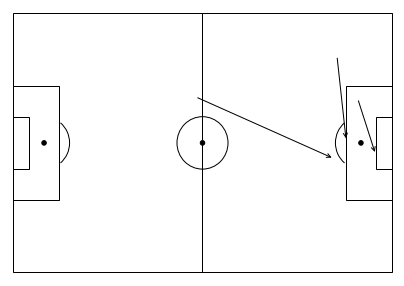

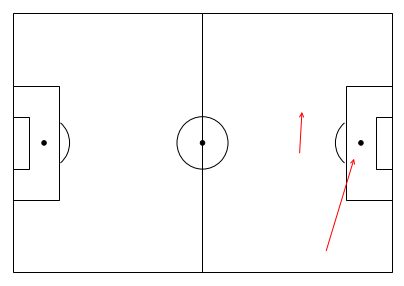

In [45]:
#miracle_match = sb.matches(competition_id=16, season_id=37)
miracle_df = sb.events(match_id=2302764)
miracle_df_goals = miracle_df[(miracle_df.type == "Shot") & (miracle_df.shot_outcome == "Goal")]
assists = miracle_df_goals["shot_key_pass_id"].tolist()
#print(key_passes)
#miracle_df_pass1 = miracle_df[(miracle_df.type == "Pass") & (miracle_df.period == 1)]
miracle_df_assists1 = miracle_df_pass1[miracle_df_pass1['id'].isin(assists)]
#print(miracle_df_keypass1)
#miracle_df_pass2 = miracle_df[(miracle_df.type == "Pass") & (miracle_df.period == 2)]
miracle_df_assists2 = miracle_df_pass2[miracle_df_pass2['id'].isin(assists)]
pass_map(miracle_df_assists1)
pass_map(miracle_df_assists2)